In [ ]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD
from keras.constraints import maxnorm

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/MyDrive/ML/SeoulBikeData.csv'
bike_df = pd.read_csv(path, encoding='cp1252')
print("Info:-")
bike_df.info()
print("Describe:-")
bike_df.describe()

Mounted at /content/gdrive
Info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Da

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#checking missing values
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#checking duplicate values
print('Duplicate values : ', len(bike_df[bike_df.duplicated()]))

Duplicate values :  0


In [ ]:
# Dependent variable is Rented Bike Count. 
# We will change this numerical output to a binary classification 
# Adding a new variable with threshold set 
threshold = bike_df['Rented Bike Count'].quantile(0.75)
threshold

1065.25

In [ ]:
# We set the threshold to 1065.25, which is the 75th percentile for Rented Bike Count.
# Every field with a bike count above 1065.25 will be labeled 1, 
# and rest will be labeled 0.
# threshold = 1065.25
bike_df["Rented_Bike_Count_Value"] = (bike_df['Rented Bike Count'] > threshold).astype(float)
bike_df.head(5000)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented_Bike_Count_Value
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,27/06/2018,152,3,19.4,97,2.9,282,18.9,0.00,0.0,0.0,Summer,No Holiday,Yes,0.0
4996,27/06/2018,110,4,19.2,97,1.0,217,18.7,0.00,0.5,0.0,Summer,No Holiday,Yes,0.0
4997,27/06/2018,162,5,19.1,97,1.2,402,18.6,0.00,0.0,0.0,Summer,No Holiday,Yes,0.0
4998,27/06/2018,417,6,19.2,97,1.5,157,18.7,0.00,0.0,0.0,Summer,No Holiday,Yes,0.0


In [ ]:
# Data PreProcessing
bike_df.columns = ['date', 'bike_count', 'hour', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 
                   'solar_radiation', 'rainfall', 'snowfall', 'season', 'holiday', 'functioning_day','bike_count_value']

bike_df['date'] = pd.to_datetime(bike_df['date'], format = '%d/%m/%Y')
bike_df['hour'] = bike_df['hour'].astype('category')
bike_df['season'] = bike_df['season'].astype('category')
bike_df['holiday'] = bike_df['holiday'].astype('category')
bike_df['functioning_day'] = bike_df['functioning_day'].astype('category')
bike_df['day'] = bike_df['date'].dt.day_name().astype('category')

bike_df = bike_df[bike_df['functioning_day'] == 'Yes']
bike_df = bike_df.drop(['date', 'functioning_day', 'dew_point_temp'], axis = 1)
bike_df = bike_df.reset_index(drop = True)

bike_df.head()

,bike_count,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,season,holiday,bike_count_value,day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,0.0,Friday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,0.0,Friday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,0.0,Friday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,0.0,Friday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,0.0,Friday


In [ ]:
# Feature Normalisation for X and y
full_df = bike_df

full_ddf = pd.get_dummies(full_df['hour'], drop_first = True, prefix = 'hour:')
full_ddf = pd.concat([full_ddf, pd.get_dummies(full_df['day'], drop_first = True, prefix = 'day:')], axis = 1)
full_ddf = pd.concat([full_ddf, pd.get_dummies(full_df['season'], drop_first = True, prefix = 'season:')], axis = 1)
full_ddf = pd.concat([full_ddf, pd.get_dummies(full_df['holiday'],  prefix = 'holiday:')], axis = 1)
full_ddf = full_ddf.drop('holiday:_No Holiday', axis = 1)

full_df = full_df.drop(['hour', 'day', 'season', 'holiday', 'bike_count'], axis = 1)

c = bike_df['bike_count_value']

full_df = full_df.drop('bike_count_value', axis = 1)

def featureNormalize(X):
    return (X - np.mean(X, axis = 0)) / np.std(X, axis = 0, ddof = 1)

X = pd.concat([featureNormalize(full_df), full_ddf], axis = 1).reset_index(drop = True)

In [ ]:
random.seed(42)
X_train = X.sample(frac = 0.7).sort_index()
y_train = c[X.index.isin(X_train.index)]
X_test = X[~X.index.isin(X_train.index)]
y_test = c[~X.index.isin(X_train.index)]

CLUSTERING METHODS

1. k-Means

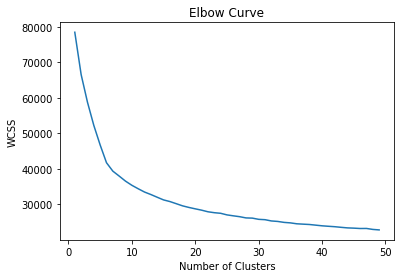

In [ ]:
wcss = []
for i in range(1, 50):
    kmeans_arr = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans_arr.fit(X)
    wcss.append(kmeans_arr.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
print('WCSS: {:.2f}'.format(kmeans.inertia_))
print(np.unique(kmeans.labels_, return_counts = True))



WCSS: 35375.02
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([1681, 1385, 1024,  847,  169, 1322,  116,  853, 1049,   19]))


In [ ]:
X_kmeans = X.copy()
X_kmeans['cluster'] = kmeans.labels_
X_kmeans = pd.concat([X_kmeans, pd.get_dummies(X_kmeans['cluster'], drop_first = True, prefix = 'cluster:')], axis = 1)
X_kmeans = X_kmeans.drop(['cluster'], axis = 1)
X_train_kmeans = X_kmeans[X_kmeans.index.isin(X_train.index)]
X_test_kmeans = X_kmeans[~X_kmeans.index.isin(X_train.index)]

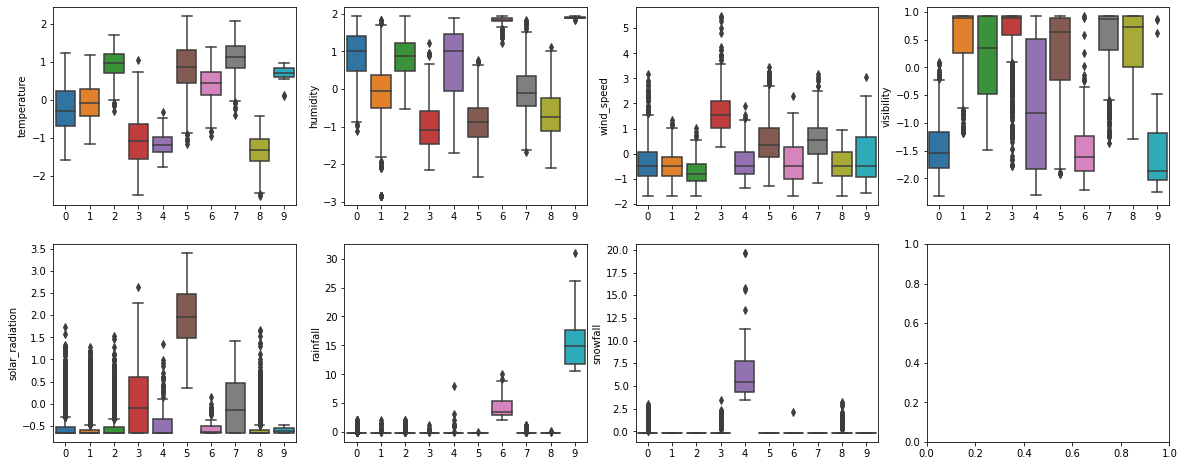

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
for i, ax in enumerate(zip(['temperature', 'humidity', 'wind_speed', 'visibility', 
                            'solar_radiation', 'rainfall', 'snowfall'], fig.axes)):
    sns.boxplot(y = X[ax[0]], x = kmeans.labels_, ax = ax[1])

In [ ]:
bike_df['cluster'] = kmeans.labels_
bike_df.groupby(['cluster', 'bike_count_value'])['bike_count'].count().reset_index().pivot('cluster', 'bike_count_value', 'bike_count')

bike_count_value,0.0,1.0
cluster,,
0,1504.0,177.0
1,960.0,425.0
2,714.0,310.0
3,781.0,66.0
4,169.0,NaN
5,701.0,621.0
6,114.0,2.0
7,273.0,580.0
8,1040.0,9.0


Model - ANN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD
from keras.constraints import maxnorm
from warnings import filterwarnings
import tensorflow
from tensorflow import keras

In [ ]:
def nn1_model(neurons = 0):
    model = Sequential()
    model.add(Input(shape = (49, )))
    model.add(Dense(neurons, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.SGD(lr = 0.1, momentum = 0.1)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model


In [ ]:
nnc_neuron_arr = [1, 5, 10, 15, 20, 25, 30]

nnc1_model = KerasClassifier(build_fn = nn1_model, batch_size = 10, epochs = 100, verbose = 0)

kmeans_nnc_model = GridSearchCV(estimator = nnc1_model, 
                                param_grid = {'neurons' : nnc_neuron_arr}, 
                                n_jobs = -1, cv = 5, return_train_score = True)

kmeans_nnc_model.fit(X_train_kmeans.values, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f06325c3c50>,
             n_jobs=-1, param_grid={'neurons': [1, 5, 10, 15, 20, 25, 30]},
             return_train_score=True)

Best Parameters: {'neurons': 25}
Best Cross-Validation Accuracy: 0.86


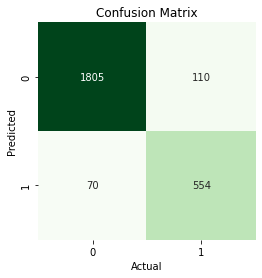

Accuracy: 0.93
Sensitivity: 0.83
Specificity: 0.96


In [ ]:
print('Best Parameters: {}'.format(kmeans_nnc_model.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(kmeans_nnc_model.best_score_))

pred_kmeans_nnc = kmeans_nnc_model.predict(X_test_kmeans)

cm_kmeans_nnc = confusion_matrix(y_test, pred_kmeans_nnc)
tn, fp, fn, tp = cm_kmeans_nnc.ravel()

ax = sns.heatmap(cm_kmeans_nnc.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_kmeans_nnc)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))

2. Expected Maximization

In [ ]:
exp_max = GaussianMixture(n_components = 10, init_params = 'kmeans', max_iter = 300, n_init = 10, random_state = 0)
exp_max.fit(X)
em_means = exp_max.means_
print(np.unique(exp_max.predict(X), return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 674,  131, 1079,  178,  453, 1147,  841,   70, 1393, 2499]))


In [ ]:
X_expmax = X.copy()
X_expmax['cluster'] = exp_max.predict(X)
X_expmax = pd.concat([X_expmax, pd.get_dummies(X_expmax['cluster'], drop_first = True, prefix = 'cluster:')], axis = 1)
X_expmax = X_expmax.drop(['cluster'], axis = 1)
X_train_em = X_expmax[X_expmax.index.isin(X_train.index)]
X_test_em = X_expmax[~X_expmax.index.isin(X_train.index)]

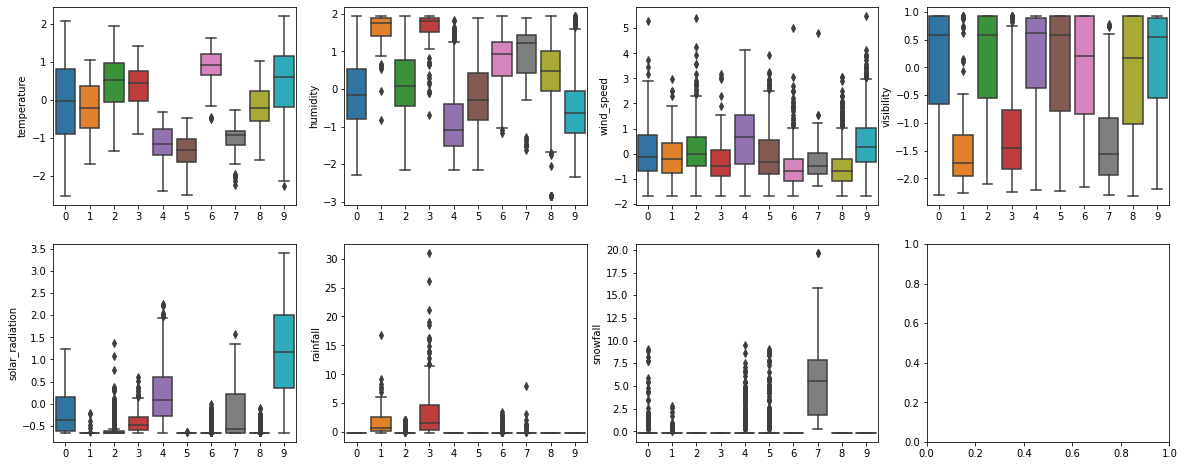

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))
for i, ax in enumerate(zip(['temperature', 'humidity', 'wind_speed', 'visibility', 
                            'solar_radiation', 'rainfall', 'snowfall'], fig.axes)):
    sns.boxplot(y = X[ax[0]], x = exp_max.predict(X), ax = ax[1])

In [ ]:
bike_df['cluster'] = exp_max.predict(X)
bike_df.groupby(['cluster', 'bike_count_value'])['bike_count'].count().reset_index().pivot('cluster', 'bike_count_value', 'bike_count')

bike_count_value,0.0,1.0
cluster,,
0,313.0,361.0
1,131.0,NaN
2,359.0,720.0
3,171.0,7.0
4,453.0,NaN
5,1147.0,NaN
6,700.0,141.0
7,70.0,NaN
8,1312.0,81.0


Model - ANN

In [ ]:
def nn2_model(neurons = 0):
    model = Sequential()
    model.add(Input(shape = (49, )))
    model.add(Dense(neurons, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.SGD(lr = 0.1, momentum = 0.1)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model

In [ ]:
nnc_neuron_arr = [1, 5, 10, 15, 20, 25, 30]

nnc2_model = KerasClassifier(build_fn = nn2_model, batch_size = 10, epochs = 100, verbose = 0)

em_nnc_model = GridSearchCV(estimator = nnc2_model, 
                            param_grid = {'neurons' : nnc_neuron_arr}, 
                            n_jobs = -1, cv = 5, return_train_score = True)

em_nnc_model.fit(X_train_em.values, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f062e3f79d0>,
             n_jobs=-1, param_grid={'neurons': [1, 5, 10, 15, 20, 25, 30]},
             return_train_score=True)

Best Parameters: {'neurons': 30}
Best Cross-Validation Accuracy: 0.88


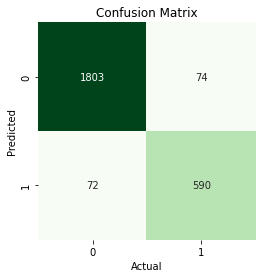

Accuracy: 0.94
Sensitivity: 0.89
Specificity: 0.96


In [ ]:
print('Best Parameters: {}'.format(em_nnc_model.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(em_nnc_model.best_score_))

pred_em_nnc = em_nnc_model.predict(X_test_em)

cm_em_nnc = confusion_matrix(y_test, pred_em_nnc)
tn, fp, fn, tp = cm_em_nnc.ravel()

ax = sns.heatmap(cm_em_nnc.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_em_nnc)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))

DIMENSION REDUCTION TECHNIQUES

1. Random Forest - Feature Importance

In [ ]:
random.seed(0)

rf = RandomForestClassifier() 
rf.fit(X_train, y_train.values.ravel()) 

pd.DataFrame({'feature' : [i.split(':', 1)[0] for i in X_train.columns], 
              'importance' : rf.feature_importances_}).groupby('feature').sum().sort_values('importance', ascending = False)

,importance
feature,
hour,0.281022
temperature,0.239699
humidity,0.099690
season,0.087879
solar_radiation,0.083181
wind_speed,0.067751
visibility,0.062926
day,0.055373
rainfall,0.015539


In [ ]:
topvariable_list = ['temperature', 'hour', 'season', 'humidity', 'solar_radiation']

top_df = bike_df[topvariable_list]
top_ddf = pd.get_dummies(top_df['hour'], drop_first = True, prefix = 'hour:')
top_ddf = pd.concat([top_ddf, pd.get_dummies(top_df['season'], drop_first = True, prefix = 'season:')], axis = 1)

top_df = top_df.drop(['hour', 'season'], axis = 1)

X_randomforest = pd.concat([featureNormalize(top_df), top_ddf], axis = 1).reset_index(drop = True)



In [ ]:
X_train_rf = X_randomforest[X_randomforest.index.isin(X_train.index)]
X_test_rf = X_randomforest[~X_randomforest.index.isin(X_train.index)]



Model - ANN

In [ ]:
def nn3_model(neurons = 0):
    model = Sequential()
    model.add(Input(shape = (29, )))
    model.add(Dense(neurons, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.SGD(lr = 0.1, momentum = 0.1)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model

In [ ]:
nnc_neuron_arr = [1, 5, 10, 15, 20, 25, 30]

nnc3_model = KerasClassifier(build_fn = nn3_model, batch_size = 10, epochs = 100, verbose = 0)

rf_nnc_model = GridSearchCV(estimator = nnc3_model, 
                            param_grid = {'neurons' : nnc_neuron_arr}, 
                            n_jobs = -1, cv = 5, return_train_score = True)

rf_nnc_model.fit(X_train_rf.values, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe3c8559b50>,
             n_jobs=-1, param_grid={'neurons': [1, 5, 10, 15, 20, 25, 30]},
             return_train_score=True)

Best Parameters: {'neurons': 30}
Best Cross-Validation Accuracy: 0.70


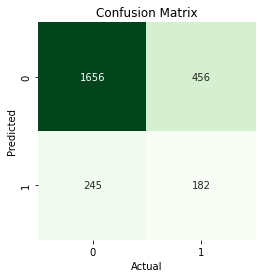

Accuracy: 0.72
Sensitivity: 0.29
Specificity: 0.87


In [ ]:
print('Best Parameters: {}'.format(rf_nnc_model.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(rf_nnc_model.best_score_))

pred_rf_nnc = rf_nnc_model.predict(X_test_rf)

cm_rf_nnc = confusion_matrix(y_test, pred_rf_nnc)
tn, fp, fn, tp = cm_rf_nnc.ravel()

ax = sns.heatmap(cm_rf_nnc.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_rf_nnc)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))

2. PCA

In [ ]:
pca = PCA(random_state = 0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
np.round(pca.explained_variance_ratio_ * 100, 2)

array([2.303e+01, 1.678e+01, 1.113e+01, 9.450e+00, 8.160e+00, 6.820e+00,
       2.690e+00, 2.550e+00, 1.630e+00, 1.590e+00, 1.550e+00, 1.530e+00,
       1.490e+00, 6.800e-01, 5.500e-01, 4.900e-01, 4.800e-01, 4.800e-01,
       4.800e-01, 4.800e-01, 4.700e-01, 4.700e-01, 4.700e-01, 4.700e-01,
       4.600e-01, 4.600e-01, 4.600e-01, 4.500e-01, 4.500e-01, 4.500e-01,
       4.500e-01, 4.500e-01, 4.400e-01, 4.400e-01, 4.300e-01, 4.300e-01,
       2.900e-01, 2.400e-01, 1.400e-01, 2.000e-02])

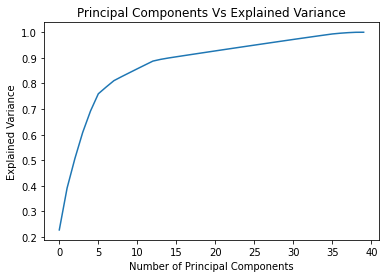

In [ ]:
plt.plot(range(len(pca.explained_variance_ratio_ )), np.cumsum(pca.explained_variance_ratio_))
plt.title('Principal Components Vs Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [ ]:
labels = {
    str(i): f"PC {i + 1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(X_train_pca, labels = labels, dimensions = range(6), color = y_train)
fig.update_traces(diagonal_visible = False)
fig.update_layout(autosize = False, width = 900, height = 900)
fig.show()

Model - ANN

In [ ]:
def nn4_model(neurons = 0):
    model = Sequential()
    model.add(Input(shape = (13, )))
    model.add(Dense(neurons, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.SGD(lr = 0.1, momentum = 0.1)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model



In [ ]:
nnc_neuron_arr = [1, 5, 10, 15, 20, 25, 30]

nnc4_model = KerasClassifier(build_fn = nn4_model, batch_size = 10, epochs = 100, verbose = 0)

pca_nnc_model = GridSearchCV(estimator = nnc4_model, 
                             param_grid = {'neurons' : nnc_neuron_arr}, 
                             n_jobs = 1, cv = 5, return_train_score = True)

pca_nnc_model.fit(X_train_pca[:,:13], y_train.values.ravel())


GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9484d5e810>,
             n_jobs=1, param_grid={'neurons': [1, 5, 10, 15, 20, 25, 30]},
             return_train_score=True)

Best Parameters: {'neurons': 15}
Best Cross-Validation Accuracy: 0.77


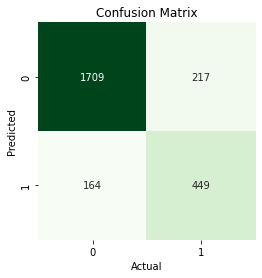

Accuracy: 0.85
Sensitivity: 0.67
Specificity: 0.91


In [ ]:
print('Best Parameters: {}'.format(pca_nnc_model.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(pca_nnc_model.best_score_))

pred_pca_nnc = pca_nnc_model.predict(X_test_pca[:,:13])

cm_pca_nnc = confusion_matrix(y_test, pred_pca_nnc)
tn, fp, fn, tp = cm_pca_nnc.ravel()

ax = sns.heatmap(cm_pca_nnc.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_pca_nnc)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))

3. Independent Component Analysis

In [ ]:
ica = FastICA(max_iter = 1000, random_state = 0)
X_train_ica = ica.fit_transform(X_train)
X_train_ica_df = pd.DataFrame(X_train_ica)
X_test_ica = ica.transform(X_test)

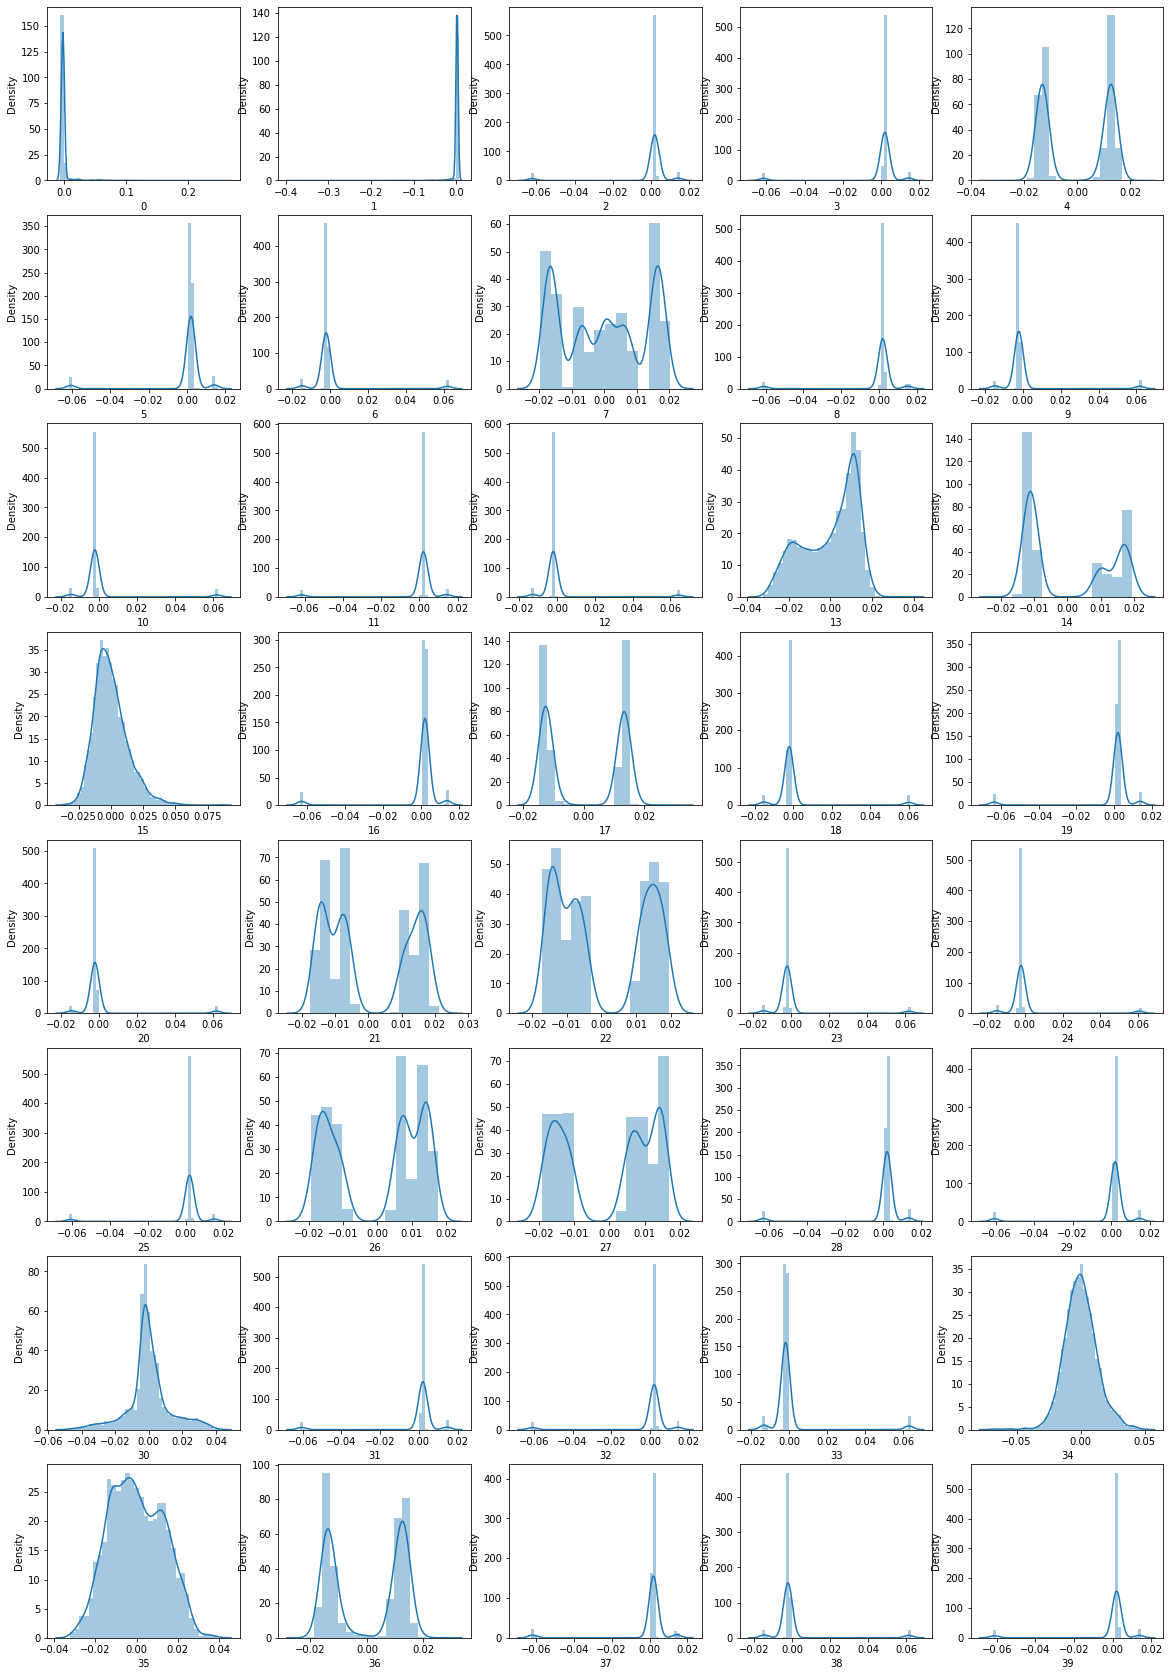

In [ ]:


fig, axes = plt.subplots(nrows = 8, ncols = 5, figsize = (20, 30))
for i, ax in enumerate(zip(X_train_ica_df.columns, fig.axes)):
    sns.distplot(X_train_ica_df[ax[0]], ax = ax[1])



4. RANDOM PROJECTION

In [ ]:
rp = GaussianRandomProjection(random_state = 0, n_components = 13)
X_train_rp = rp.fit_transform(X_train)
X_test_rp = rp.transform(X_test)

Model - ANN

In [ ]:
def nn6_model(neurons = 0):
    model = Sequential()
    model.add(Input(shape = (13, )))
    model.add(Dense(neurons, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.SGD(lr = 0.1, momentum = 0.1)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model


In [ ]:
nnc_neuron_arr = [1, 5, 10, 15, 20, 25, 30]

nnc6_model = KerasClassifier(build_fn = nn6_model, batch_size = 10, epochs = 100, verbose = 0)

rp_nnc_model = GridSearchCV(estimator = nnc6_model, 
                             param_grid = {'neurons' : nnc_neuron_arr}, 
                             n_jobs = -1, cv = 5, return_train_score = True)

rp_nnc_model.fit(X_train_rp, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe3c8376890>,
             n_jobs=-1, param_grid={'neurons': [1, 5, 10, 15, 20, 25, 30]},
             return_train_score=True)

Best Parameters: {'neurons': 25}
Best Cross-Validation Accuracy: 0.80


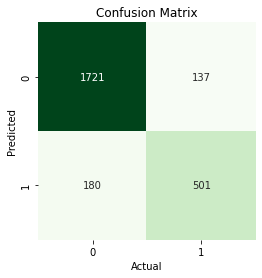

Accuracy: 0.88
Sensitivity: 0.79
Specificity: 0.91


In [ ]:
print('Best Parameters: {}'.format(rp_nnc_model.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(rp_nnc_model.best_score_))

pred_rp_nnc = rp_nnc_model.predict(X_test_rp)

cm_rp_nnc = confusion_matrix(y_test, pred_rp_nnc)
tn, fp, fn, tp = cm_rp_nnc.ravel()

ax = sns.heatmap(cm_rp_nnc.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_rp_nnc)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))

Cluster Algorithms with Dimensionality Reduction Techniques

1.k-Means on Features Selected using Random Forest

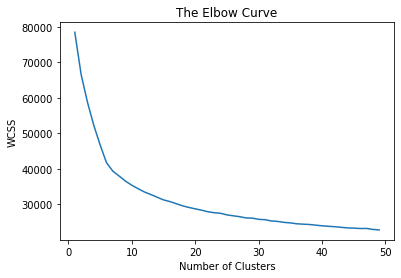

In [ ]:
wcss_rf = []
for i in range(1, 50):
    kmeans_arr = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans_arr.fit(X_randomforest)
    wcss_rf.append(kmeans_arr.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans_rf = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_rf.fit(X_randomforest)
print('WCSS: {:.2f}'.format(kmeans_rf.inertia_))
print(np.unique(kmeans_rf.labels_, return_counts = True))

WCSS: 13380.28
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 626,  740,  597, 1069, 1017,  516,  477,  889, 1258, 1276]))


In [ ]:
X_kmeans_rf = X_randomforest.copy()
X_kmeans_rf['cluster'] = kmeans_rf.labels_
X_kmeans_rf = pd.concat([X_kmeans_rf, 
                         pd.get_dummies(X_kmeans_rf['cluster'], drop_first = True, prefix = 'cluster:')], axis = 1)
X_kmeans_rf = X_kmeans_rf.drop(['cluster'], axis = 1)
X_train_kmeans_rf = X_kmeans_rf[X_kmeans_rf.index.isin(X_train.index)]
X_test_kmeans_rf = X_kmeans_rf[~X_kmeans_rf.index.isin(X_train.index)]

Model - ANN

In [ ]:
def nn7_model(neurons = 0):
    model = Sequential()
    model.add(Input(shape = (38, )))
    model.add(Dense(neurons, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.SGD(lr = 0.1, momentum = 0.1)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics= ['accuracy'])
    return model

In [ ]:
nnc_neuron_arr = [1, 5, 10, 15, 20, 25, 30]

nnc7_model = KerasClassifier(build_fn = nn7_model, batch_size = 10, epochs = 100, verbose = 0)

kmeans_rf_nnc_model = GridSearchCV(estimator = nnc7_model, 
                             param_grid = {'neurons' : nnc_neuron_arr}, 
                             n_jobs = 1, cv = 5, return_train_score = True)


kmeans_rf_nnc_model.fit(X_train_kmeans_rf.values, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9484d48710>,
             n_jobs=1, param_grid={'neurons': [1, 5, 10, 15, 20, 25, 30]},
             return_train_score=True)

Best Parameters: {'neurons': 30}
Best Cross-Validation Accuracy: 0.85


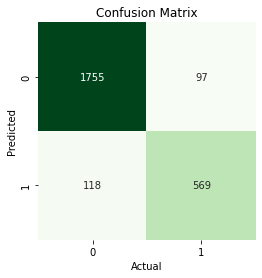

Accuracy: 0.92
Sensitivity: 0.85
Specificity: 0.94


In [ ]:
print('Best Parameters: {}'.format(kmeans_rf_nnc_model.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(kmeans_rf_nnc_model.best_score_))

pred_kmeans_rf_nnc = kmeans_rf_nnc_model.predict(X_test_kmeans_rf)

cm_kmeans_rf_nnc = confusion_matrix(y_test, pred_kmeans_rf_nnc)
tn, fp, fn, tp = cm_kmeans_rf_nnc.ravel()

ax = sns.heatmap(cm_kmeans_rf_nnc.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_kmeans_rf_nnc)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))

2. k-Means on PCA Features

In [ ]:
pca2 = PCA(random_state = 0)
X_kmeans_pca = pca2.fit_transform(X)
np.round(pca2.explained_variance_ratio_ * 100, 2)

array([2.306e+01, 1.642e+01, 1.152e+01, 9.880e+00, 8.290e+00, 6.750e+00,
       2.600e+00, 2.520e+00, 1.580e+00, 1.550e+00, 1.530e+00, 1.520e+00,
       1.480e+00, 6.800e-01, 5.300e-01, 4.600e-01, 4.500e-01, 4.500e-01,
       4.500e-01, 4.500e-01, 4.500e-01, 4.500e-01, 4.500e-01, 4.500e-01,
       4.500e-01, 4.500e-01, 4.500e-01, 4.500e-01, 4.500e-01, 4.500e-01,
       4.500e-01, 4.500e-01, 4.500e-01, 4.500e-01, 4.500e-01, 4.400e-01,
       2.800e-01, 2.200e-01, 1.400e-01, 2.000e-02])

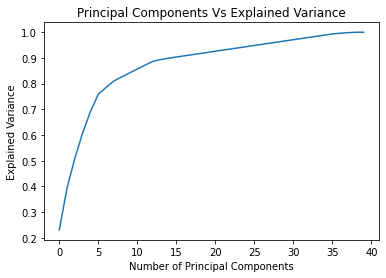

In [ ]:
plt.plot(range(len(pca2.explained_variance_ratio_ )), np.cumsum(pca2.explained_variance_ratio_))
plt.title('Principal Components Vs Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()

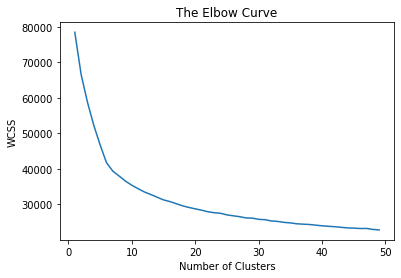

In [ ]:
wcss_pca = []
for i in range(1, 50):
    kmeans_arr = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans_arr.fit(X_kmeans_pca[:,:13])
    wcss_rf.append(kmeans_arr.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_pca.fit(X_kmeans_pca[:,:13])
print('WCSS: {:.2f}'.format(kmeans_pca.inertia_))
print(np.unique(kmeans_pca.labels_, return_counts = True))

WCSS: 26655.37
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 718, 1578, 1369, 1453,  749,  167,  109,  788, 1515,   19]))


In [ ]:
X_kmeans_pca_df = pd.DataFrame(X_kmeans_pca[:,:13])
X_kmeans_pca_df['cluster'] = kmeans_pca.labels_
X_kmeans_pca_df = pd.concat([X_kmeans_pca_df, 
                          pd.get_dummies(X_kmeans_pca_df['cluster'], drop_first = True, prefix = 'cluster:')], axis = 1)
X_kmeans_pca_df = X_kmeans_pca_df.drop(['cluster'], axis = 1)
X_train_kmeans_pca = X_kmeans_pca_df[X_kmeans_pca_df.index.isin(X_train.index)]
X_test_kmeans_pca = X_kmeans_pca_df[~X_kmeans_pca_df.index.isin(X_train.index)]

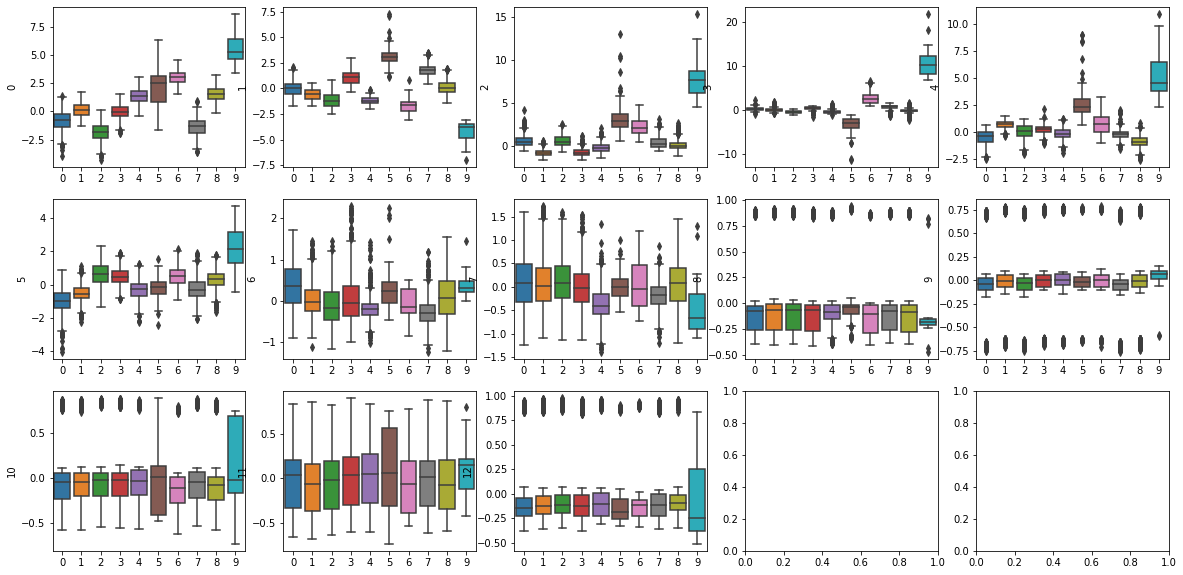

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (20, 10))
for i, ax in enumerate(zip(X_kmeans_pca_df.iloc[:,:13].columns.values, fig.axes)):
    sns.boxplot(y = X_kmeans_pca_df[ax[0]], x = kmeans_pca.labels_, ax = ax[1])

Model - ANN

In [ ]:
def nn8_model(neurons = 0):
    model = Sequential()
    model.add(Input(shape = (22, )))
    model.add(Dense(neurons, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.SGD(lr = 0.1, momentum = 0.1)
    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics= ['accuracy'])
    return model

In [ ]:
nnc_neuron_arr = [1, 5, 10, 15, 20, 25, 30]

nnc8_model = KerasClassifier(build_fn = nn8_model, batch_size = 10, epochs = 100, verbose = 0)

kmeans_pca_nnc_model = GridSearchCV(estimator = nnc8_model, 
                                    param_grid = {'neurons' : nnc_neuron_arr}, 
                                    n_jobs = 1, cv = 5, return_train_score = True)

kmeans_pca_nnc_model.fit(X_train_kmeans_pca, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f94791a5ad0>,
             n_jobs=1, param_grid={'neurons': [1, 5, 10, 15, 20, 25, 30]},
             return_train_score=True)

Best Parameters: {'neurons': 20}
Best Cross-Validation Accuracy: 0.77


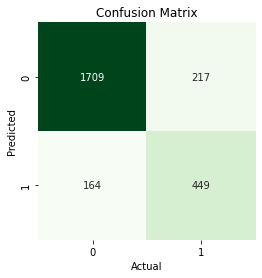

Accuracy: 0.86
Sensitivity: 0.67
Specificity: 0.91


In [ ]:
print('Best Parameters: {}'.format(kmeans_pca_nnc_model.best_params_))
print('Best Cross-Validation Accuracy: {:.2f}'.format(kmeans_pca_nnc_model.best_score_))

pred_kmeans_pca_nnc = kmeans_pca_nnc_model.predict(X_test_kmeans_pca)

cm_kmeans_pca_nnc = confusion_matrix(y_test, pred_pca_nnc)
tn, fp, fn, tp = cm_kmeans_pca_nnc.ravel()

ax = sns.heatmap(cm_kmeans_pca_nnc.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Greens')
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Confusion Matrix')
plt.show()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_kmeans_pca_nnc)))
print('Sensitivity: {:.2f}'.format(tp / (tp + fn)))
print('Specificity: {:.2f}'.format(tn / (tn + fp)))